In [14]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df= pd.read_csv("movies_data_2.0.csv")
df

,Название,Год выпуска,Длительность,Жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков,Рейтинг российских кинокритиков,Голоса КиноПоиск,Голоса IMDB,Голоса кинокритиков,Голоса российских кинокритиков,Бюджет,Дата премьеры в России,Дата премьеры в мире,Мировые кассовые сборы
0,1+1,2011,112.0,"['драма', 'комедия']",8.846,8.5,6.8,100.0000,2431363,966636,128,12,10355000,2012-04-26T00:00:00.000Z,2011-09-23T00:00:00.000Z,426588510
1,Джентльмены,2019,113.0,"['криминал', 'комедия', 'боевик']",8.626,7.8,6.6,86.3636,2145499,427468,278,22,22000000,2020-02-13T00:00:00.000Z,2019-12-03T00:00:00.000Z,115171795
2,Брат,1997,96.0,"['драма', 'криминал', 'боевик']",8.338,7.8,7.6,0.0000,1572786,26162,5,2,44955845,1997-12-12T00:00:00.000Z,1997-05-17T00:00:00.000Z,1362281
3,Гнев человеческий,2021,119.0,"['боевик', 'триллер']",7.668,7.1,6.3,72.2222,1548405,221419,260,36,40000000,2021-04-22T00:00:00.000Z,2021-04-22T00:00:00.000Z,103966489
4,Волк с Уолл-стрит,2013,180.0,"['драма', 'криминал', 'биография', 'комедия']",8.033,8.2,7.8,77.4194,1460341,1660210,284,31,100000000,2014-02-06T00:00:00.000Z,2013-12-09T00:00:00.000Z,392000694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,Овечка Долли была злая и рано умерла,2015,109.0,"['фантастика', 'комедия', 'приключения']",6.715,5.8,0.0,0.0000,26802,334,0,2,960000,2015-02-19T00:00:00.000Z,2015-11-05T00:00:00.000Z,112164013
4870,Орел и решка,1995,82.0,"['комедия', 'мелодрама']",7.875,7.0,0.0,0.0000,26799,577,0,0,44955845,1995-11-03T00:00:00.000Z,1995-11-03T00:00:00.000Z,112164013
4871,Ничего себе поездочка,2001,97.0,"['боевик', 'триллер', 'детектив']",6.927,6.6,6.6,0.0000,26789,78541,116,0,23000000,2001-10-31T00:00:00.000Z,2001-09-09T00:00:00.000Z,36642838
4872,Американский огурчик,2020,88.0,"['комедия', 'фантастика', 'драма']",5.991,5.7,6.1,100.0000,26781,27737,170,3,44955845,2020-07-26T00:00:00.000Z,2020-07-26T00:00:00.000Z,499649


Посмотрим на данные

In [16]:
no_skobochka = str.maketrans("", "", "[]'")


In [17]:
df["Жанры"] = df["Жанры"].apply(lambda x: x.translate(no_skobochka).split(','))
df["Дата премьеры в мире"] = df["Дата премьеры в мире"].apply(lambda x: x.replace('T00:00:00.000Z',''))

In [18]:
#уберем ненужные столбцы, переведем в датный формат даты
del df["Дата премьеры в России"]
del df["Голоса кинокритиков"]
del df["Голоса российских кинокритиков"]
df.loc[:,"Дата премьеры в мире"]=pd.to_datetime(df["Дата премьеры в мире"])
df.sort_values("Дата премьеры в мире")

,Название,Год выпуска,Длительность,Жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков,Рейтинг российских кинокритиков,Голоса КиноПоиск,Голоса IMDB,Бюджет,Дата премьеры в мире,Мировые кассовые сборы
3066,Малыш,1921,53.0,"[драма, комедия, семейный]",8.267,8.2,8.7,0.0000,52514,139636,250000,1921-01-16 00:00:00,5450000
2655,Огни большого города,1931,87.0,"[комедия, мелодрама, драма]",8.485,8.5,9.2,0.0000,62946,204897,1500000,1931-01-30 00:00:00,23916
4015,Александр Невский,1938,111.0,"[военный, биография, драма, боевик, история]",8.064,7.5,8.8,0.0000,36208,12602,44955845,1938-11-25 00:00:00,2226
567,Унесённые ветром,1939,222.0,"[мелодрама, история, драма, военный]",8.430,8.2,8.8,0.0000,250491,343434,3977000,1939-12-15 00:00:00,391023031
3944,Подкидыш,1939,68.0,"[драма, комедия]",8.072,7.5,0.0,0.0000,37159,844,44955845,1940-01-27 00:00:00,21857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,Бриджит Джонс. Без ума от мальчишки,2025,123.0,"[драма, комедия, мелодрама]",7.282,6.7,7.1,46.6667,299356,17337,44955845,2025-02-12 00:00:00,103679000
3168,По любви,2024,73.0,"[мелодрама, комедия]",7.097,0.0,0.0,0.0000,50420,0,44955845,2025-02-13 00:00:00,112164013
1829,Пророк. История Александра Пушкина,2025,137.0,"[мюзикл, мелодрама, драма]",7.080,7.2,0.0,70.3704,95664,563,9600000,2025-02-14 00:00:00,112164013
2180,Ущелье,2024,127.0,"[ужасы, фантастика, боевик, мелодрама, при...",7.033,6.7,6.0,60.0000,79202,84659,44955845,2025-02-14 00:00:00,112164013


In [19]:
#самый большой бюджет в n-ом году
def min_budget(year1,year2):
    df_year=df[df["Дата премьеры в мире"].apply(lambda x:x.year <= year2 and x.year >=year1)]
    return int(df_year["Бюджет"].min())
def mean_budget(year1,year2):
    df_year=df[df["Дата премьеры в мире"].apply(lambda x:x.year <= year2 and x.year >=year1)]
    return int(df_year["Бюджет"].mean())


In [20]:
max_year=df["Дата премьеры в мире"].max().year
min_year=df["Дата премьеры в мире"].min().year
df_number_of_films= pd.DataFrame(columns=['год', 'количество выпущенных фильмов'])

list_of_years = np.arange(min_year, max_year+1)

for i in list_of_years:
     df_number_of_films.loc[len(df_number_of_films)] = [i, int(df["Дата премьеры в мире"].apply(lambda x:x.year == i).sum())]

df_number_of_films

,год,количество выпущенных фильмов
0,1921,1
1,1922,0
2,1923,0
3,1924,0
4,1925,0
...,...,...
100,2021,213
101,2022,236
102,2023,240
103,2024,176


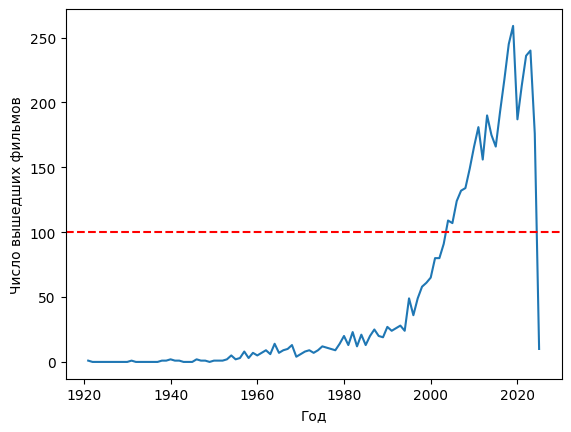

In [21]:
plt.plot(df_number_of_films["год"], df_number_of_films["количество выпущенных фильмов"])
plt.axhline(y=100, color="r", linestyle="dashed", label="100")
plt.ylabel('Число вышедших фильмов')
plt.xlabel('Год')
plt.show()

Видно, что в нашей выборке много годов с маленьким количеством вышедших фильмов. Для детального анализа оставим только те года, в которые выпускалось больше 100 фильмов.

In [22]:
df_100=df_number_of_films.loc[df_number_of_films["количество выпущенных фильмов"]>=100]
df_100

,год,количество выпущенных фильмов
83,2004,109
84,2005,107
85,2006,124
86,2007,132
87,2008,134
88,2009,149
89,2010,166
90,2011,181
91,2012,156
92,2013,190


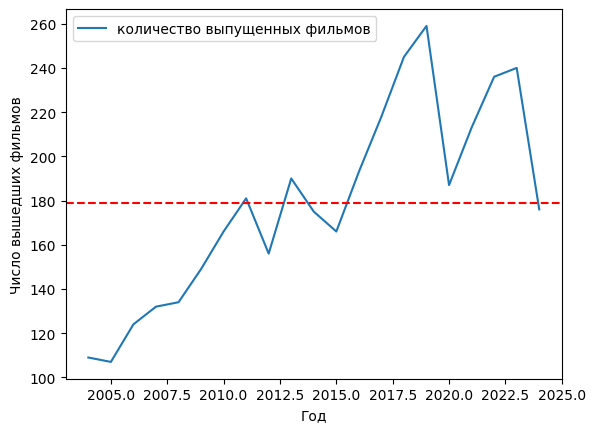

In [23]:
df_100.plot(x="год",y="количество выпущенных фильмов")
plt.axhline(y=df_100["количество выпущенных фильмов"].mean(), color="r", linestyle="dashed", label="среднее")
plt.ylabel('Число вышедших фильмов')
plt.xlabel('Год')
plt.show()